In [134]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

steam_data = pd.read_csv(r'C:\Users\Cecilia\Downloads\ironhack\coursework\group work\group project week3\first_project_cfg\data\clean\owen_clean.csv')

steam_data.head()

,steamId,name,release_date,copies_sold,price_USD,price_local,revenue,avgPlaytime,publisherClass,publishers,developers,required_age,is_free,description,about the game,languages,genres,categories,estimated owners,peak ccu,metacritic score,review_score,user score,positive,negative,recommendations,average playtime forever,average playtime two weeks,median playtime forever,median playtime two weeks
0,2315690,WWE 2K24,2024-03-07,165301,99.99,£24.99,8055097.0,42.365140,AAA,2K,Visual Concepts,16.0,False,Experience a gripping retelling of WrestleMani...,FORTY YEARS OF WRESTLEMANIA WrestleMania is th...,"English, French, Italian, German, Spanish - Sp...","Simulation, Sports","Single-player, Multi-player, PvP, Online PvP, ...",100000 - 200000,5080.0,0.0,71,0.0,1044.0,621.0,1396.0,1865.0,1865.0,2147.0,2147.0
1,2291060,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,£49.99,7882151.0,29.651061,Indie,D3PUBLISHER,SANDLOT,0.0,False,Live the future of despair.The year is 2024 AD...,Live the future of despair. 2022 AD. The seque...,"English, Traditional Chinese, Japanese, Korean...",Action,"Single-player, Multi-player, Co-op, Online Co-...",100000 - 200000,13591.0,0.0,57,0.0,758.0,1306.0,3052.0,432.0,432.0,622.0,622.0
2,1575940,Sins of a Solar Empire II,2024-08-15,214192,49.99,£41.99,7815247.0,12.452593,Indie,Stardock Entertainment,"Ironclad Games Corporation, Stardock Entertain...",0.0,False,Battle for galactic dominance in this real-tim...,Sins of a Solar Empire II is the sequel to the...,"English, French, Italian, German, Japanese, Ko...","Simulation, Strategy","Single-player, Multi-player, PvP, Online PvP, ...",100000 - 200000,5654.0,0.0,88,0.0,3416.0,481.0,3430.0,126.0,126.0,151.0,151.0
3,1859910,Legend of Mortal,2024-06-14,440998,19.99,£10.00,7756399.0,24.797817,Indie,"Paras Games, Obb Studio Inc.",Obb Studio Inc.,0.0,False,The game world is set in a turbulent state and...,Legend of Mortal is a stand-alone RPG for PC. ...,"Traditional Chinese, Simplified Chinese","Adventure, Indie, RPG, Strategy","Single-player, Steam Achievements, Full contro...",0 - 20000,0.0,0.0,76,0.0,0.0,0.0,11240.0,692.0,692.0,1037.0,1037.0
4,1875830,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,CDN$ 55.99,7629252.0,34.258496,AA,SEGA,ATLUS,17.0,False,Become a mighty demigod and battle through a d...,Bonus: 2 Sacred Treasure Sets (Until 04:00 am ...,"English, French, Italian, German, Spanish - Sp...","Adventure, RPG","Single-player, Steam Achievements, Full contro...",0 - 20000,17528.0,90.0,96,0.0,0.0,0.0,1476.0,0.0,0.0,0.0,0.0


In [135]:
# Define a function to update genre columns in the DataFrame
def update_genres(df, genre_list, column_name='genres'):
    """
    This function updates the genres column by adding boolean columns indicating the presence of specific genres.
    It also cleans the 'genres' column by removing the genres found in the list.
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - genre_list: List of genres to check and remove from the 'genres' column.
    - column_name: Name of the column containing the genres (default is 'genres').
    
    Returns:
    - The modified DataFrame with new boolean columns and cleaned 'genres' column.
    """
    for genre in genre_list:
        # Create a new column with boolean value indicating the genre presence
        df[genre] = df[column_name].str.contains(genre, case=False, na=False)
        
        # Remove the genre from the 'genres' column if it exists
        df[column_name] = df[column_name].str.replace(genre, '', case=False, regex=False)
        
    # Clean up any unnecessary commas or spaces in the 'genres' column
    df[column_name] = df[column_name].str.replace(r'\s*,\s*', ', ', regex=True)  # Remove extra spaces around commas
    df[column_name] = df[column_name].str.replace(r'^\s*,|\s*,\s*$', '', regex=True)  # Remove leading/trailing commas

    return df

# List of genres to check and remove
genres_list = ['Indie', 'Early Access', 'Free to Play', 'Simulation', 'Sports', 'Action', 
               'Strategy', 'Adventure', 'RPG', 'Massively Multiplayer', 'Casual', 'Racing', 'Animation & Modeling', 
               'Design & Illustration', 'Education', 'Game Development']

# Apply the function to update the DataFrame
steam_data = update_genres(steam_data, genres_list)

steam_data.head()

,steamId,name,release_date,copies_sold,price_USD,price_local,revenue,avgPlaytime,publisherClass,publishers,developers,required_age,is_free,description,about the game,languages,genres,categories,estimated owners,peak ccu,metacritic score,review_score,user score,positive,negative,recommendations,average playtime forever,average playtime two weeks,median playtime forever,median playtime two weeks,Indie,Early Access,Free to Play,Simulation,Sports,Action,Strategy,Adventure,RPG,Massively Multiplayer,Casual,Racing,Animation & Modeling,Design & Illustration,Education,Game Development
0,2315690,WWE 2K24,2024-03-07,165301,99.99,£24.99,8055097.0,42.365140,AAA,2K,Visual Concepts,16.0,False,Experience a gripping retelling of WrestleMani...,FORTY YEARS OF WRESTLEMANIA WrestleMania is th...,"English, French, Italian, German, Spanish - Sp...",,"Single-player, Multi-player, PvP, Online PvP, ...",100000 - 200000,5080.0,0.0,71,0.0,1044.0,621.0,1396.0,1865.0,1865.0,2147.0,2147.0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
1,2291060,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,£49.99,7882151.0,29.651061,Indie,D3PUBLISHER,SANDLOT,0.0,False,Live the future of despair.The year is 2024 AD...,Live the future of despair. 2022 AD. The seque...,"English, Traditional Chinese, Japanese, Korean...",,"Single-player, Multi-player, Co-op, Online Co-...",100000 - 200000,13591.0,0.0,57,0.0,758.0,1306.0,3052.0,432.0,432.0,622.0,622.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,1575940,Sins of a Solar Empire II,2024-08-15,214192,49.99,£41.99,7815247.0,12.452593,Indie,Stardock Entertainment,"Ironclad Games Corporation, Stardock Entertain...",0.0,False,Battle for galactic dominance in this real-tim...,Sins of a Solar Empire II is the sequel to the...,"English, French, Italian, German, Japanese, Ko...",,"Single-player, Multi-player, PvP, Online PvP, ...",100000 - 200000,5654.0,0.0,88,0.0,3416.0,481.0,3430.0,126.0,126.0,151.0,151.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
3,1859910,Legend of Mortal,2024-06-14,440998,19.99,£10.00,7756399.0,24.797817,Indie,"Paras Games, Obb Studio Inc.",Obb Studio Inc.,0.0,False,The game world is set in a turbulent state and...,Legend of Mortal is a stand-alone RPG for PC. ...,"Traditional Chinese, Simplified Chinese",",","Single-player, Steam Achievements, Full contro...",0 - 20000,0.0,0.0,76,0.0,0.0,0.0,11240.0,692.0,692.0,1037.0,1037.0,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False
4,1875830,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,CDN$ 55.99,7629252.0,34.258496,AA,SEGA,ATLUS,17.0,False,Become a mighty demigod and battle through a d...,Bonus: 2 Sacred Treasure Sets (Until 04:00 am ...,"English, French, Italian, German, Spanish - Sp...",,"Single-player, Steam Achievements, Full contro...",0 - 20000,17528.0,90.0,96,0.0,0.0,0.0,1476.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [136]:
#filter for indie games by publisher class
indie_df = steam_data[(steam_data['publisherClass'] == 'Indie')]
indie_df.head()

,steamId,name,release_date,copies_sold,price_USD,price_local,revenue,avgPlaytime,publisherClass,publishers,developers,required_age,is_free,description,about the game,languages,genres,categories,estimated owners,peak ccu,metacritic score,review_score,user score,positive,negative,recommendations,average playtime forever,average playtime two weeks,median playtime forever,median playtime two weeks,Indie,Early Access,Free to Play,Simulation,Sports,Action,Strategy,Adventure,RPG,Massively Multiplayer,Casual,Racing,Animation & Modeling,Design & Illustration,Education,Game Development
1,2291060,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,£49.99,7882151.0,29.651061,Indie,D3PUBLISHER,SANDLOT,0.0,False,Live the future of despair.The year is 2024 AD...,Live the future of despair. 2022 AD. The seque...,"English, Traditional Chinese, Japanese, Korean...",,"Single-player, Multi-player, Co-op, Online Co-...",100000 - 200000,13591.0,0.0,57,0.0,758.0,1306.0,3052.0,432.0,432.0,622.0,622.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,1575940,Sins of a Solar Empire II,2024-08-15,214192,49.99,£41.99,7815247.0,12.452593,Indie,Stardock Entertainment,"Ironclad Games Corporation, Stardock Entertain...",0.0,False,Battle for galactic dominance in this real-tim...,Sins of a Solar Empire II is the sequel to the...,"English, French, Italian, German, Japanese, Ko...",,"Single-player, Multi-player, PvP, Online PvP, ...",100000 - 200000,5654.0,0.0,88,0.0,3416.0,481.0,3430.0,126.0,126.0,151.0,151.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
3,1859910,Legend of Mortal,2024-06-14,440998,19.99,£10.00,7756399.0,24.797817,Indie,"Paras Games, Obb Studio Inc.",Obb Studio Inc.,0.0,False,The game world is set in a turbulent state and...,Legend of Mortal is a stand-alone RPG for PC. ...,"Traditional Chinese, Simplified Chinese",",","Single-player, Steam Achievements, Full contro...",0 - 20000,0.0,0.0,76,0.0,0.0,0.0,11240.0,692.0,692.0,1037.0,1037.0,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False
5,2646460,Soulmask,2024-05-30,304685,29.99,£24.99,7540563.0,95.697813,Indie,Qooland Games,CampFire Studio,0.0,False,"Escaping a deadly sacrificial ritual, you find...",Wishlist To Stay Notified Soulmask is a sandbo...,"English, Simplified Chinese, Spanish - Spain, ...",", , ,","Single-player, Multi-player, PvP, Online PvP, ...",0 - 20000,0.0,0.0,79,0.0,0.0,0.0,1833.0,0.0,0.0,0.0,0.0,True,True,False,True,False,False,False,True,True,True,False,False,False,False,False,False
6,352720,The Universim,2024-01-22,328945,29.99,£22.99,7534369.0,16.868531,Indie,Crytivo,Crytivo,0.0,False,Jump straight into managing your own planets a...,Love The Universim? Join the Crytivo Club and ...,"English, French, German, Spanish - Spain, Port...",,"Single-player, Steam Achievements, Steam Tradi...",200000 - 500000,208.0,0.0,81,0.0,5677.0,1210.0,5534.0,2680.0,0.0,1140.0,0.0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False


In [137]:
# Perform the melt operation for the genres of interest
melt_by_genre = pd.melt(indie_df, 
                        id_vars=['name', 'revenue', 'copies_sold'], 
                        value_vars=genres_list[3:],  # Starting from index 3 to avoid 'Indie' and 'Free to Play'
                        var_name='genre', value_name='is_in_genre')

# Filter only the rows where the genre is present (True)
melt_by_genre = melt_by_genre[melt_by_genre['is_in_genre']]

# Generate summary statistics by genre
genre_summary = melt_by_genre.groupby('genre').agg(
    count=('name', 'count'),
    total_revenue=('revenue', 'sum'),
    avg_revenue_per_game=('revenue', 'mean'),
    total_copies_sold=('copies_sold', 'sum'),
    min_revenue=('revenue', 'min'),
    Q1_revenue=('revenue', lambda x: x.quantile(0.25)),
    median_revenue=('revenue', 'median'),
    Q3_revenue=('revenue', lambda x: x.quantile(0.75)),
    max_revenue=('revenue', 'max')
).reset_index()

# Calculate the average revenue per copy sold
genre_summary['avg_rev_per_copy_sold'] = genre_summary['total_revenue'] / genre_summary['total_copies_sold']

# Sort the summary by total revenue
genre_summary = genre_summary.sort_values(by=['total_revenue'], ascending=False)

# Display the final genre summary
print(genre_summary)

                    genre  count  total_revenue  avg_revenue_per_game  \
1               Adventure    593   4.530540e+08          7.640034e+05   
0                  Action    469   4.058550e+08          8.653625e+05   
10             Simulation    489   3.730953e+08          7.629762e+05   
8                     RPG    483   3.494843e+08          7.235699e+05   
12               Strategy    360   2.943444e+08          8.176233e+05   
3                  Casual    487   2.533871e+08          5.203021e+05   
7   Massively Multiplayer     47   1.084814e+08          2.308115e+06   
9                  Racing     26   1.890430e+07          7.270885e+05   
11                 Sports     35   1.629912e+07          4.656892e+05   
4   Design & Illustration      1   5.109600e+04          5.109600e+04   
2    Animation & Modeling      1   5.109600e+04          5.109600e+04   
5               Education      1   5.109600e+04          5.109600e+04   
6        Game Development      1   5.109600e+04    

In [138]:
indie_by_genre = pd.melt(indie_df, id_vars=['name', 'revenue', 'copies_sold'],
                        value_vars=['Simulation', 'RPG', 'Racing', 'Action',
                                     'Adventure', 'Sports'],
                        var_name='genre', value_name='is_in_genre')

indie_by_genre = indie_by_genre[indie_by_genre['is_in_genre'] == True]

indie_by_genre = indie_by_genre[['name', 'revenue', 'copies_sold', 'genre']]

indie_by_genre

,name,revenue,copies_sold,genre
1,Sins of a Solar Empire II,7815247.0,214192,Simulation
3,Soulmask,7540563.0,304685,Simulation
4,The Universim,7534369.0,328945,Simulation
5,Bellwright,7481940.0,280955,Simulation
6,Night of the Dead,7091792.0,394364,Simulation
...,...,...,...,...
7632,Esports Godfather,1072894.0,65251,Sports
7643,MotoGP™24,954851.0,23431,Sports
7650,Gym Simulator 24,884330.0,109135,Sports
7676,WE ARE FOOTBALL 2024,779187.0,25210,Sports


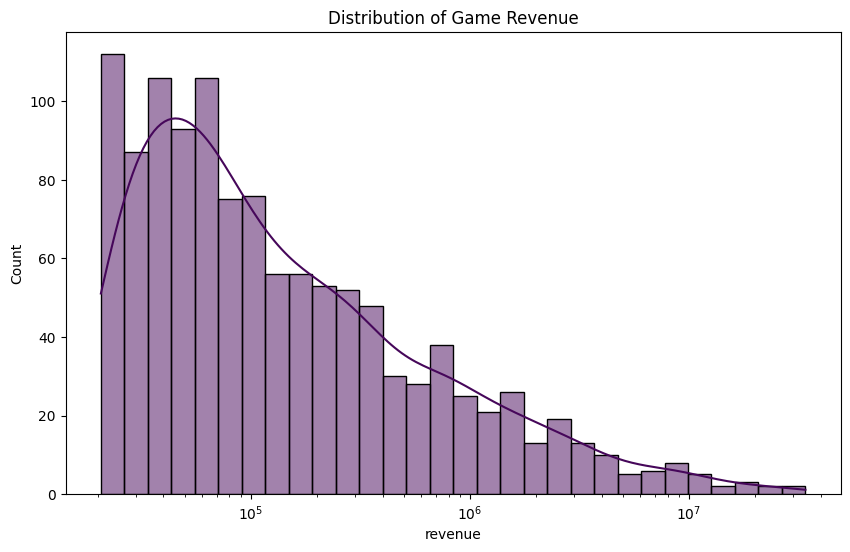

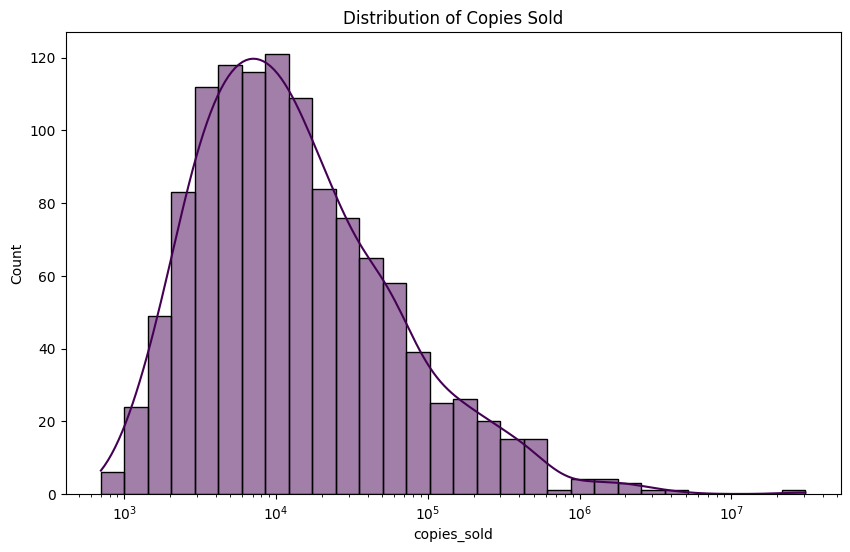

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming `indie_by_genre` DataFrame is already available
df = indie_by_genre[['name', 'revenue', 'copies_sold']].copy()
df = df.drop_duplicates(subset='name')

# Normalize the 'revenue' and 'copies_sold' columns to apply color mapping
norm_revenue = Normalize(vmin=df['revenue'].min(), vmax=df['revenue'].max())
norm_copies_sold = Normalize(vmin=df['copies_sold'].min(), vmax=df['copies_sold'].max())

# ScalarMappable to use 'viridis' colormap
cmap_revenue = ScalarMappable(norm=norm_revenue, cmap='viridis')
cmap_copies_sold = ScalarMappable(norm=norm_copies_sold, cmap='viridis')

# Apply color to each revenue and copies_sold
df['revenue_color'] = [cmap_revenue.to_rgba(x) for x in df['revenue']]
df['copies_sold_color'] = [cmap_copies_sold.to_rgba(x) for x in df['copies_sold']]

# Plotting Histogram for Revenue with log scale and viridis colormap
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], kde=True, bins=30, log_scale=True, color=cmap_revenue.to_rgba(df['revenue'].mean()))  # Apply color based on average
plt.title('Distribution of Game Revenue')

# Save the figure with a white background
plt.savefig(r'C:\Users\Cecilia\Downloads\ironhack\coursework\group work\group project week3\first_project_cfg\figures\game_revenue_distribution_cfg.png', 
            format="png", dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

# Plotting Histogram for Copies Sold with log scale and viridis colormap
plt.figure(figsize=(10, 6))
sns.histplot(df['copies_sold'], kde=True, bins=30, log_scale=True, color=cmap_copies_sold.to_rgba(df['copies_sold'].mean()))  # Apply color based on average
plt.title('Distribution of Copies Sold')

# Save the figure with a white background
plt.savefig(r'..\figures\game_copies_sold_distribution_cfg.png', 
            format="png", dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

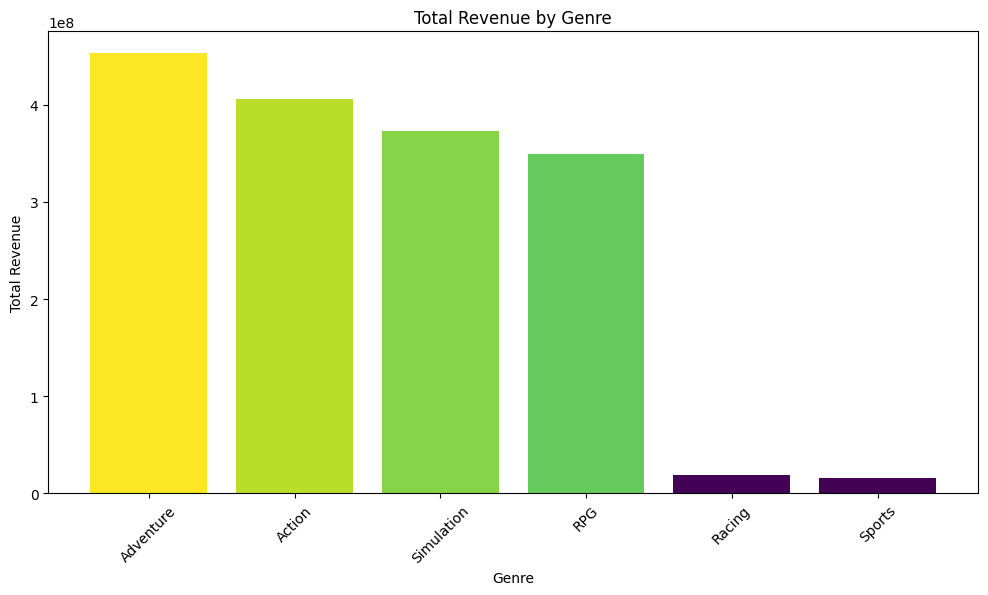

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming `indie_by_genre` DataFrame is already available
df = indie_by_genre[['name', 'genre', 'revenue', 'copies_sold']].copy()

# Aggregating total revenue, total copies sold, and count by genre
genre_performance = df.groupby('genre').agg(
    total_revenue=('revenue', 'sum'),
    total_copies_sold=('copies_sold', 'sum'),
    count=('name', 'nunique')  # count of unique games per genre
).sort_values(by='total_revenue', ascending=False)

# Normalize total revenue for applying color scale
norm = Normalize(vmin=genre_performance['total_revenue'].min(), vmax=genre_performance['total_revenue'].max())
cmap = ScalarMappable(norm=norm, cmap='viridis')

# Plotting Bar plot for Total Revenue by Genre with viridis color map
plt.figure(figsize=(12, 6))

# Apply viridis colormap for bar colors based on total_revenue
bars = plt.bar(genre_performance.index, genre_performance['total_revenue'], color=[cmap.to_rgba(x) for x in genre_performance['total_revenue']])

# Add titles and labels
plt.title('Total Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Save the plot with a white background
plt.savefig(r'..\figures\indie_total_rev_by_genre_cfg.png', format="png", dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()


Index(['steamId', 'name', 'release_date', 'copies_sold', 'price_USD',
       'price_local', 'revenue', 'avgPlaytime', 'publisherClass', 'publishers',
       'developers', 'required_age', 'is_free', 'description',
       'about the game', 'languages', 'genres', 'categories',
       'estimated owners', 'peak ccu', 'metacritic score', 'review_score',
       'user score', 'positive', 'negative', 'recommendations',
       'average playtime forever', 'average playtime two weeks',
       'median playtime forever', 'median playtime two weeks', 'Indie',
       'Early Access', 'Free to Play', 'Simulation', 'Sports', 'Action',
       'Strategy', 'Adventure', 'RPG', 'Massively Multiplayer', 'Casual',
       'Racing', 'Animation & Modeling', 'Design & Illustration', 'Education',
       'Game Development'],
      dtype='object')
All playtime columns are present.


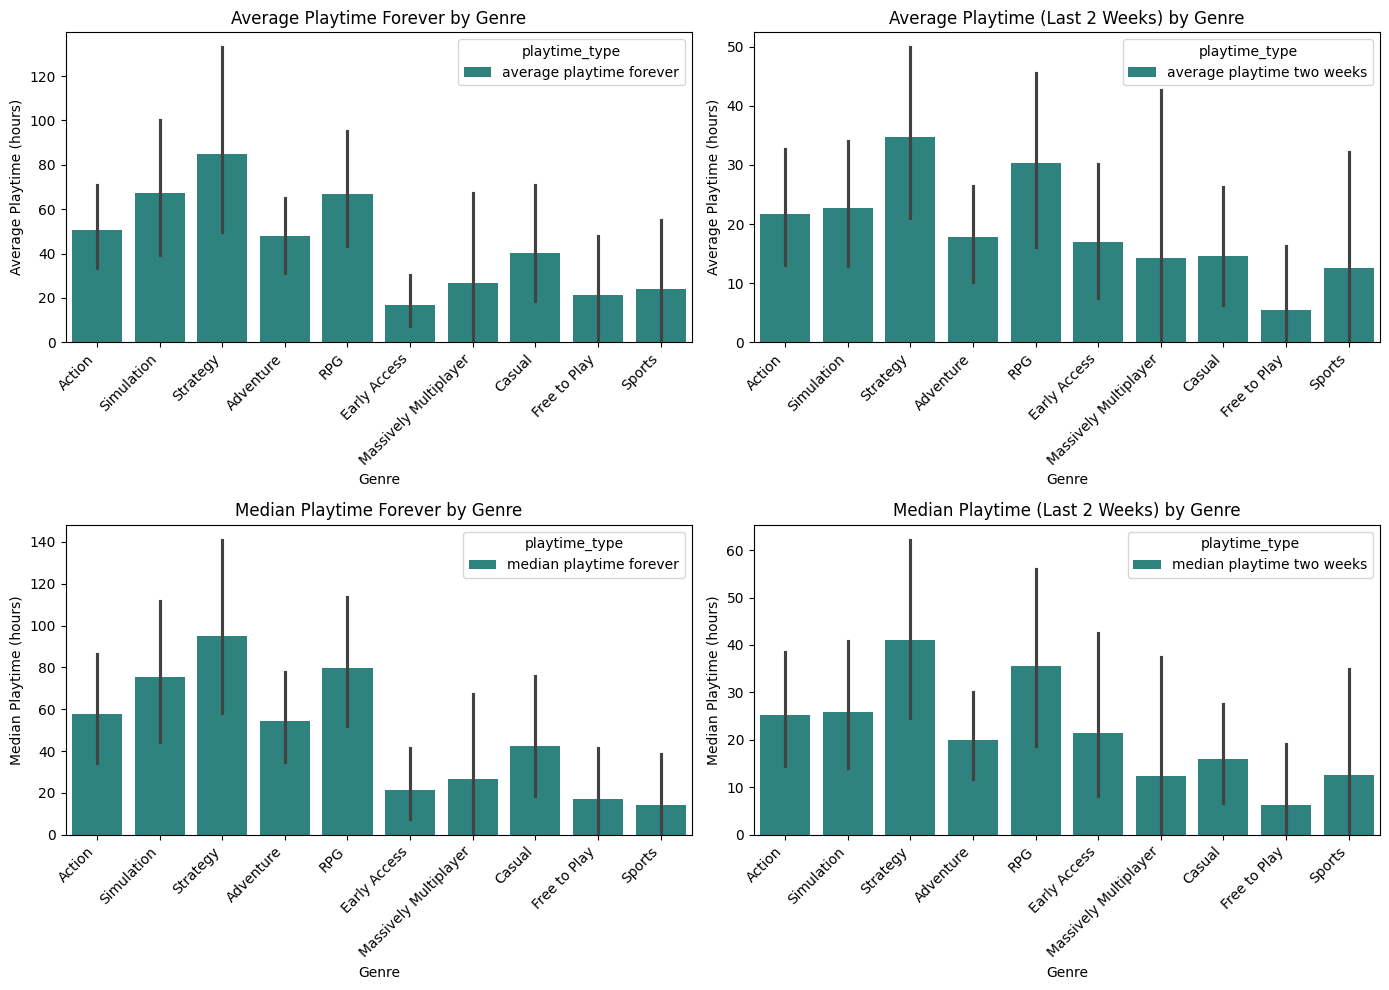

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the columns in indie_df to make sure we have the right playtime columns
print(indie_df.columns)

# List of playtime columns to be checked
playtime_columns = ['average playtime forever', 'average playtime two weeks', 
                    'median playtime forever', 'median playtime two weeks']

# Check if the required columns exist in indie_df
missing_columns = [col for col in playtime_columns if col not in indie_df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All playtime columns are present.")

# Proceed if all columns are present
if not missing_columns:
    # Melt the DataFrame for each playtime column, creating a long-format DataFrame
    melted_df = indie_df.melt(id_vars=['name'], 
                              value_vars=playtime_columns,
                              var_name='playtime_type', 
                              value_name='playtime')

    # Now, we need to map each game to its genres. This is a bit tricky since each game can belong to multiple genres.
    # Assuming you have genre columns where each genre is a separate column, we'll keep track of them.
    genre_columns = ['Early Access', 'Free to Play', 'Simulation', 'Sports', 'Action', 
                     'Strategy', 'Adventure', 'RPG', 'Massively Multiplayer', 'Casual']
    
    # Create a new DataFrame with 'name' and the genre columns
    genre_df = indie_df[['name'] + genre_columns]  # Include the 'name' column here

    # Create a genre column that combines all genre columns (a one-hot encoding style)
    # Convert the genre columns into a single "genre" column with corresponding game names
    genre_melted = genre_df.melt(id_vars=['name'], var_name='genre', value_name='is_genre')

    # Only keep rows where 'is_genre' is 1, i.e., where the game belongs to the genre
    genre_melted = genre_melted[genre_melted['is_genre'] == 1]

    # Merge the playtime data with genre data based on the 'name' column
    merged_df = pd.merge(melted_df, genre_melted[['name', 'genre']], on='name', how='left')

    # Now, let's plot the data for each of the playtime variables for each genre
    plt.figure(figsize=(14, 10))

    # Plot for Average Playtime Forever
    plt.subplot(2, 2, 1)
    sns.barplot(x='genre', y='playtime', hue='playtime_type', data=merged_df[merged_df['playtime_type'] == 'average playtime forever'], palette='viridis')
    plt.title('Average Playtime Forever by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Average Playtime (hours)')
    plt.xticks(rotation=45, ha='right')

    # Plot for Average Playtime 2 Weeks
    plt.subplot(2, 2, 2)
    sns.barplot(x='genre', y='playtime', hue='playtime_type', data=merged_df[merged_df['playtime_type'] == 'average playtime two weeks'], palette='viridis')
    plt.title('Average Playtime (Last 2 Weeks) by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Average Playtime (hours)')
    plt.xticks(rotation=45, ha='right')

    # Plot for Median Playtime Forever
    plt.subplot(2, 2, 3)
    sns.barplot(x='genre', y='playtime', hue='playtime_type', data=merged_df[merged_df['playtime_type'] == 'median playtime forever'], palette='viridis')
    plt.title('Median Playtime Forever by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Median Playtime (hours)')
    plt.xticks(rotation=45, ha='right')

    # Plot for Median Playtime 2 Weeks
    plt.subplot(2, 2, 4)
    sns.barplot(x='genre', y='playtime', hue='playtime_type', data=merged_df[merged_df['playtime_type'] == 'median playtime two weeks'], palette='viridis')
    plt.title('Median Playtime (Last 2 Weeks) by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Median Playtime (hours)')
    plt.xticks(rotation=45, ha='right')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Save the figure with a white background
    plt.savefig(r'..\figures\playtime_by_genre_cfgc.png', format='png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
    plt.show()
else:
    print("Please fix missing columns and try again.")
